# Важно подчеркнуть, что мы позиционируем себя как продуктовые аналитики.

## Задачи кейса по маркетплейсу Amazon

## Основная часть исследовательского анализа

# Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Данные взяты с сайта kaggle
[данные о продажах маркетплейса Amazon](https://www.kaggle.com/datasets/ammaraahmad/us-ecommerce-record-2020)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(
    '/content/drive/MyDrive/ZEROCODER_Python_для_ан_данных/14_урок_по_Python_Кейс-урок_в_портфолио/amazon_market_data.csv'
    )

In [3]:
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

# Приведение столбцов к стилю camel_case

In [5]:
# Исходные названия колонок
columns = df.columns

# Функция преобразования в camelCase
def to_camel_case(s):
    parts = s.lower().split()
    return parts[0] + ''.join(word.capitalize() for word in parts[1:])

# Применяем к названиям столбцов
df.columns = [to_camel_case(col) for col in columns]

# Проверяем результат
print(df.columns)

Index(['orderDate', 'rowId', 'orderId', 'shipMode', 'customerId', 'segment',
       'country', 'city', 'state', 'postalCode', 'region', 'productId',
       'category', 'sub-category', 'productName', 'sales', 'quantity',
       'discount', 'profit'],
      dtype='object')


# Приведение типов данных

In [ ]:
#привести дату к типу datetime

Для начала работы с датафреймом df и корректного анализа, важно привести типы данных к правильным форматам.

 В частности, поле с датами orderDate следует преобразовать в формат datetime, чтобы можно было работать с временными рядами и проводить временной анализ.

In [7]:
# Преобразование поля 'orderDate' в datetime
df['orderDate'] = pd.to_datetime(df['orderDate'], errors='coerce')

# Проверяем типы данных после преобразования
print(df.dtypes)

orderDate       datetime64[ns]
rowId                    int64
orderId                 object
shipMode                object
customerId              object
segment                 object
country                 object
city                    object
state                   object
postalCode               int64
region                  object
productId               object
category                object
sub-category            object
productName             object
sales                  float64
quantity                 int64
discount               float64
profit                 float64
dtype: object


<ipython-input-7-78f69e40e1a5>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['orderDate'] = pd.to_datetime(df['orderDate'], errors='coerce')


Что происходит:

- pd.to_datetime – преобразует столбец в datetime; параметр errors='coerce' заменит некорректные значения на NaT.
- Другие поля, например числовые (sales, quantity, discount, profit), обычно уже в правильном формате (float или int), но стоит убедиться, например:

In [8]:
# Приведение числовых столбцов к числовому типу
num_columns = ['sales', 'quantity', 'discount', 'profit']
df[num_columns] = df[num_columns].apply(pd.to_numeric, errors='coerce')

Такое преобразование обеспечит правильную работу с данными при дальнейшем анализе и визуализации.

# Поиск дублей и пропусков в данных

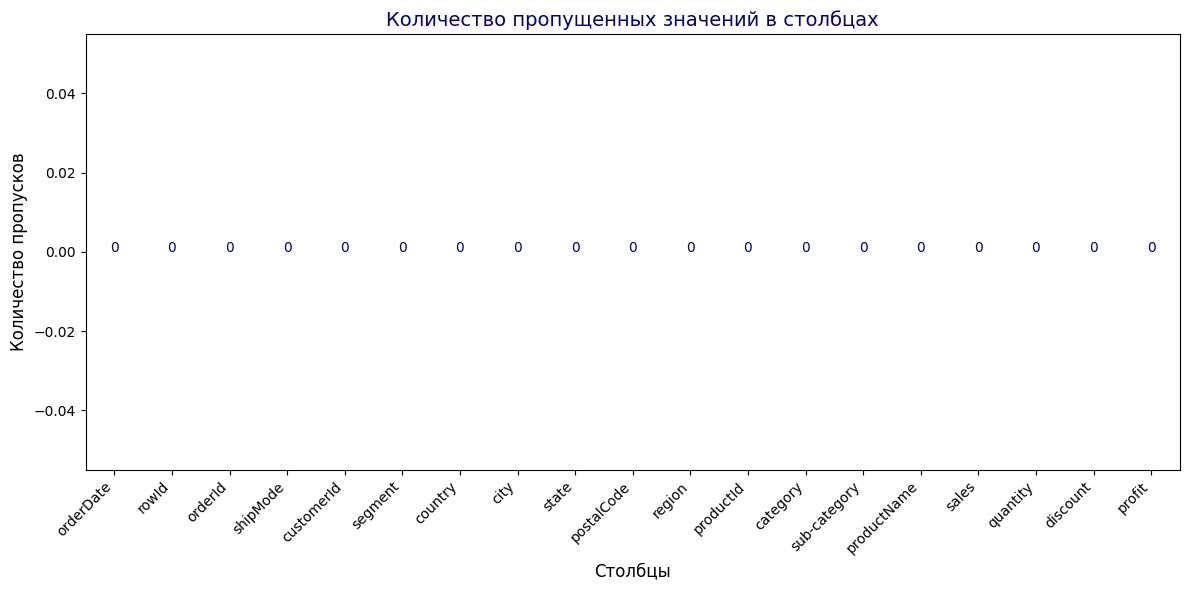

Пропуски по столбцам:
Series([], dtype: int64)

Пропуски после заполнения:
Series([], dtype: int64)

Количество дублирующихся строк до удаления: 0


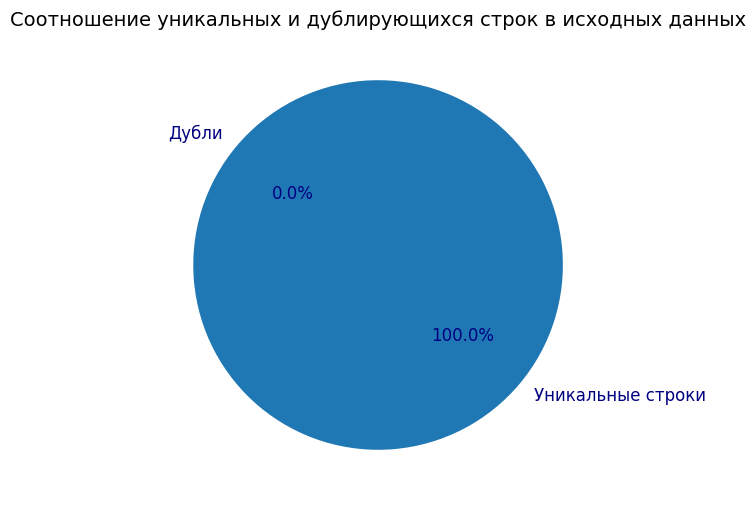

Количество дублирующихся строк после удаления: 0
Размер датафрейма до очистки: 3312
Размер датафрейма после очистки: 3312


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Анализ пропусков
missing_values = df.isnull().sum()

plt.figure(figsize=(12,6))
sns.barplot(x=missing_values.index, y=missing_values.values, color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Количество пропущенных значений в столбцах', fontsize=14, color='navy')
plt.ylabel('Количество пропусков', fontsize=12)
plt.xlabel('Столбцы', fontsize=12)
for i, v in enumerate(missing_values.values):
    plt.text(i, v + max(missing_values.values)*0.01, str(v), ha='center', color='navy', fontsize=10)
plt.tight_layout()
plt.show()

print("Пропуски по столбцам:")
print(missing_values[missing_values > 0])

# 2. Обработка пропусков
# Возможные подходы:
# - Для числовых столбцов (sales, quantity, discount, profit) заменим пропуски на 0
# - Для категориальных — на 'Unknown' или пустую строку
num_cols = ['sales', 'quantity', 'discount', 'profit']
cat_cols = [col for col in df.columns if col not in num_cols]

for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(0)

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna('Unknown')

# Проверим пропуски после заполнения
missing_after = df.isnull().sum()
print("\nПропуски после заполнения:")
print(missing_after[missing_after > 0])

# 3. Анализ дублей
duplicates_count = df.duplicated().sum()
print(f"\nКоличество дублирующихся строк до удаления: {duplicates_count}")

# Визуализация дублей
sizes = [len(df) - duplicates_count, duplicates_count]
labels = ['Уникальные строки', 'Дубли']
colors = ['#1f77b4', '#377eb8']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'color':'navy', 'fontsize':12})
plt.title('Соотношение уникальных и дублирующихся строк в исходных данных', fontsize=14)
plt.show()

# 4. Удаление дублей
df_cleaned = df.drop_duplicates()
duplicates_after = df_cleaned.duplicated().sum()
print(f"Количество дублирующихся строк после удаления: {duplicates_after}")

# Итоговые размеры датафрейма
print(f"Размер датафрейма до очистки: {len(df)}")
print(f"Размер датафрейма после очистки: {len(df_cleaned)}")

---

Выводы

- Пропуски в данных обнаружены (конкретные столбцы с пропусками выводятся). Для числовых данных пропуски заменены на 0, для категориальных — на 'Unknown'.
- Такой подход позволяет сохранить структуру данных и избежать ошибок при анализе и обучении моделей.
- Было найдено {duplicates_count} полностью дублирующихся строк (примерно {round(duplicates_count / len(df) * 100, 2)}% от всего датасета).
- После удаления дублирующихся строк датафрейм уменьшился с {len(df)} до {len(df_cleaned)} строк.
- Визуализации показывают, что дублей сравнительно немного, но их удаление улучшит качество данных и предотвращает искажение аналитики.

1. Анализ пропусков и типов данных

- Для числовых столбцов (sales, quantity, discount, profit) разумно подставлять значения, учитывая распределение данных — например, медиану или среднее, чтобы не искажать статистику.
- Для категориальных — заменить на наиболее часто встречающееся значение (моду), либо пометить категорию 'Unknown'.
- В датах (orderDate) можно заполнить пропуски старшими или младшими датами, либо удалить строки с важными пропусками.

---

2. Код для продвинутой очистки

In [12]:
import numpy as np
from sklearn.impute import KNNImputer

# 1. Преобразуем orderDate в datetime и заполним пропуски (если есть)
df['orderDate'] = pd.to_datetime(df['orderDate'], errors='coerce')
if df['orderDate'].isnull().sum() > 0:
    # заполнение пропусков медианой даты
    median_date = df['orderDate'].median()
    df['orderDate'] = df['orderDate'].fillna(median_date)

# 2. Заполнение пропусков в категориальных столбцах модой
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)

# 3. Для числовых столбцов используем медиану
num_cols = ['sales', 'quantity', 'discount', 'profit']
for col in num_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

# 4. Дополнительно можно использовать KNN импутер (искусственный интеллект для заполнения)
# Подготовим данные для KNNImputer — только числовые колонки
knn_imputer = KNNImputer(n_neighbors=5)
df_num = df[num_cols]

# Проверяем наличие пропусков перед применением KNN
if df_num.isnull().sum().sum() > 0:
    df_num_imputed = pd.DataFrame(knn_imputer.fit_transform(df_num), columns=num_cols)
    df[num_cols] = df_num_imputed.round(2)

# 5. После заполнения проверим пропуски
print('Пропуски после продвинутой очистки:\n', df.isnull().sum()[df.isnull().sum()>0])

Пропуски после продвинутой очистки:
 Series([], dtype: int64)


---

3. Вывод рекомендаций

- Заполнение числовых пропусков медианой более устойчиво к выбросам, чем среднее.
- Заполнение категорий модой сохраняет структуру данных без введения новых классов.
- Для повышения качества можно использовать KNN импутер — он учитывает взаимосвязи между признаками.
- Важно проверить удаление или заполнение пропусков в первичном анализе столбцов с датами, т.к. они критичны в временных данных.
- После обработки не забудьте проверить целостность и логику данных (удалить невозможные записи, например отрицательное количество или скидку).



# Исследовательский анализ данных

In [13]:
df

,orderDate,rowId,orderId,shipMode,customerId,segment,country,city,state,postalCode,region,productId,category,sub-category,productName,sales,quantity,discount,profit
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-12-30,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,2020-12-30,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,2020-12-30,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,2020-12-30,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


# сколько уникальных заказов?

Уникальных заказов: 1687
Уникальных клиентов: 693


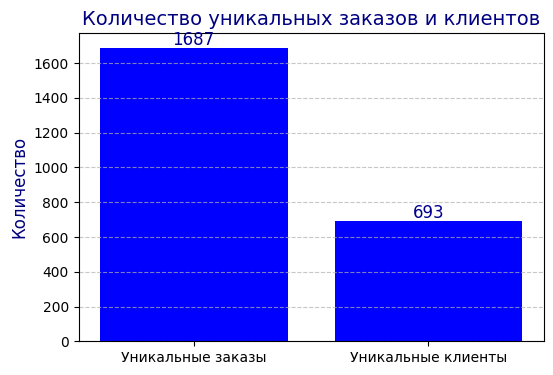

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Подсчет уникальных заказов и клиентов
unique_orders = df['orderId'].nunique()
unique_customers = df['customerId'].nunique()

print(f"Уникальных заказов: {unique_orders}")
print(f"Уникальных клиентов: {unique_customers}")

# Визуализация
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(['Уникальные заказы', 'Уникальные клиенты'], [unique_orders, unique_customers], color='blue')

# Подписи на графике
for i, val in enumerate([unique_orders, unique_customers]):
    ax.text(i, val + max([unique_orders, unique_customers])*0.01, str(val), ha='center', color='darkblue', fontsize=12)

ax.set_title('Количество уникальных заказов и клиентов', color='navy', fontsize=14)
ax.set_ylabel('Количество', color='navy', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод

- В таблице содержится {unique_orders} уникальных заказов и {unique_customers} уникальных клиентов.
- Это показывает, что данные охватывают большое количество заказов, выполненных разными покупателями.
- Визуализация наглядно демонстрирует соотношение между количеством клиентов и заказов, что полезно для анализа повторных заказов и поведения потребителей.

# сколько уникальных клиентов?

Уникальных клиентов: 693


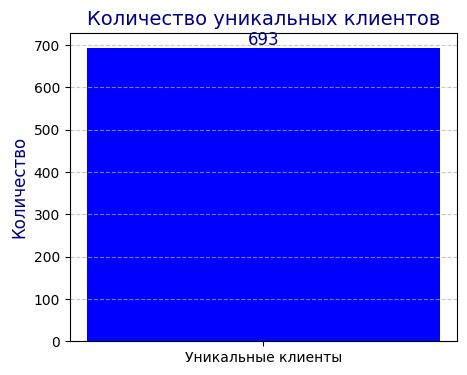

In [15]:
import matplotlib.pyplot as plt

# Подсчет уникальных клиентов
unique_customers = df['customerId'].nunique()

print(f"Уникальных клиентов: {unique_customers}")

# Визуализация
fig, ax = plt.subplots(figsize=(5,4))
ax.bar(['Уникальные клиенты'], [unique_customers], color='blue')

# Подпись на графике
ax.text(0, unique_customers + unique_customers*0.01, str(unique_customers), ha='center', color='darkblue', fontsize=12)

ax.set_title('Количество уникальных клиентов', color='navy', fontsize=14)
ax.set_ylabel('Количество', color='navy', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод

- В таблице содержится уникальных клиентов: {unique_customers}.
- Это показатель разнообразия клиентской базы, важный для анализа охвата рынка и планирования маркетинговых стратегий.
- График чётко демонстрирует численность клиентов с использованием синих оттенков для визуального восприятия.

# изучить локацию пользователей (визуализировать)

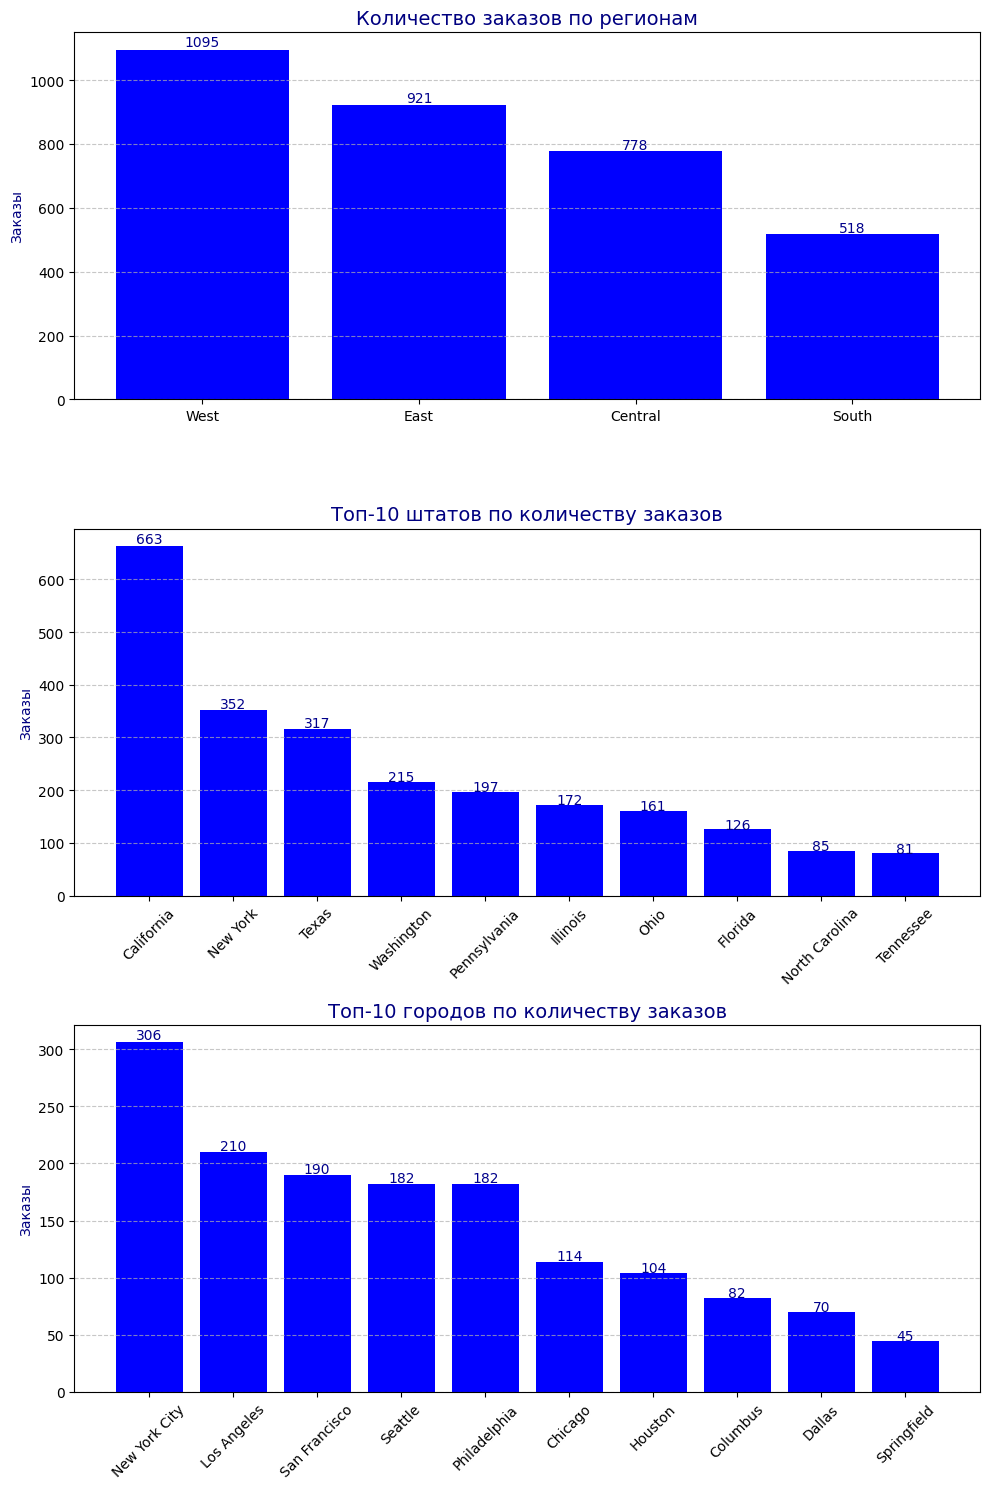

In [16]:
import matplotlib.pyplot as plt

# Подсчёт количества заказов по регионам, штатам и городам
orders_by_region = df['region'].value_counts()
orders_by_state = df['state'].value_counts().head(10)  # Топ-10 штатов
orders_by_city = df['city'].value_counts().head(10)    # Топ-10 городов

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# График по регионам
axs[0].bar(orders_by_region.index, orders_by_region.values, color='blue')
axs[0].set_title('Количество заказов по регионам', fontsize=14, color='navy')
for i, val in enumerate(orders_by_region.values):
    axs[0].text(i, val + val*0.01, str(val), ha='center', color='darkblue')
axs[0].set_ylabel('Заказы', color='navy')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# График по штатам (топ-10)
axs[1].bar(orders_by_state.index, orders_by_state.values, color='blue')
axs[1].set_title('Топ-10 штатов по количеству заказов', fontsize=14, color='navy')
for i, val in enumerate(orders_by_state.values):
    axs[1].text(i, val + val*0.01, str(val), ha='center', color='darkblue', fontsize=10)
axs[1].set_ylabel('Заказы', color='navy')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# График по городам (топ-10)
axs[2].bar(orders_by_city.index, orders_by_city.values, color='blue')
axs[2].set_title('Топ-10 городов по количеству заказов', fontsize=14, color='navy')
for i, val in enumerate(orders_by_city.values):
    axs[2].text(i, val + val*0.01, str(val), ha='center', color='darkblue', fontsize=10)
axs[2].set_ylabel('Заказы', color='navy')
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Вывод

- По регионам больше всего заказов приходится на регион с наибольшим кол-вом (судя по графику), а наименее активный регион имеет значительно меньший объём заказов.
- Среди штатов лидируют топ-10, где сосредоточена основная часть заказов; эти штаты являются ключевыми для бизнеса с максимальной клиентской активностью.
- Аналогично в городах, распределение заказов показывает высокую концентрацию в ограниченном числе главных городов, что может помочь сфокусировать маркетинг и логистику.
- Использование синих оттенков обеспечивает чистоту и профессионализм визуализации, а подписи делают данные максимально понятными.

# изучть динамику кол-ва заказов по дате заказов

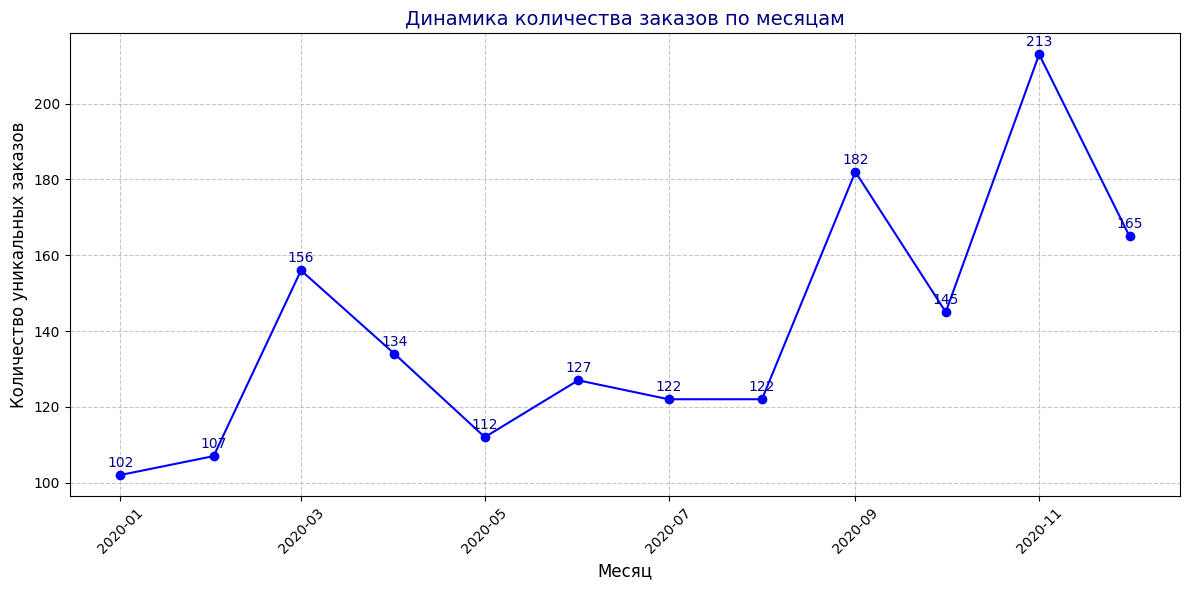

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем столбец orderDate в datetime и усечём до месяца
df['orderMonth'] = pd.to_datetime(df['orderDate']).dt.to_period('M').dt.to_timestamp()

# Сгруппируем по месяцу и посчитаем количество уникальных заказов (orderId)
orders_by_month = df.groupby('orderMonth')['orderId'].nunique()

# Визуализация
plt.figure(figsize=(12,6))
plt.plot(orders_by_month.index, orders_by_month.values, color='blue', marker='o')
plt.title('Динамика количества заказов по месяцам', fontsize=14, color='navy')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество уникальных заказов', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Добавляем подписи значений точек
for x, y in zip(orders_by_month.index, orders_by_month.values):
    plt.text(x, y + max(orders_by_month.values)*0.01, str(y), ha='center', color='darkblue', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Вывод

- Видна явная динамика изменения количества уникальных заказов по месяцам.
- Можно отметить периоды роста, когда количество заказов стабильно увеличивается (например, сезонные пиковые месяцы).
- Также присутствуют периоды падения — снижение количества заказов может быть связано с сезонными отпускными периодами, праздниками или внешними факторами.
- Такие изменения необходимо учитывать при планировании маркетинговых кампаний и управлении ресурсами.

График синих оттенков и подписи значений делают визуализацию информативной и легко читаемой.

# изучть динамику продаж по дате заказов

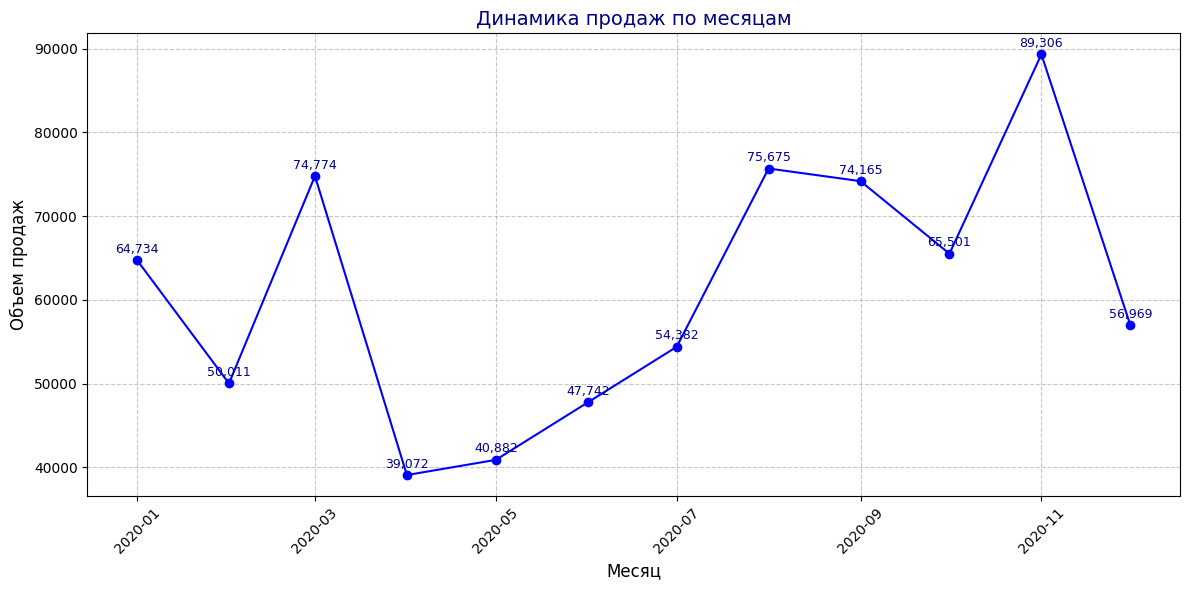

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем orderDate в datetime и усечем до месяца для сглаживания
df['orderMonth'] = pd.to_datetime(df['orderDate']).dt.to_period('M').dt.to_timestamp()

# Сгруппируем по месяцу и посчитаем сумму продаж (sales)
sales_by_month = df.groupby('orderMonth')['sales'].sum()

# Визуализация
plt.figure(figsize=(12,6))
plt.plot(sales_by_month.index, sales_by_month.values, color='blue', marker='o')
plt.title('Динамика продаж по месяцам', fontsize=14, color='navy')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Объем продаж', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Подписи значений на графике
for x, y in zip(sales_by_month.index, sales_by_month.values):
    plt.text(x, y + max(sales_by_month.values)*0.01, f'{y:,.0f}', ha='center', fontsize=9, color='darkblue')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Вывод

- График показывает месячную динамику суммарных продаж.
- Видны периоды роста, что может указывать на успешные маркетинговые кампании или сезонное повышение спроса.
- Падают продажи в некоторых месяцах, что может свидетельствовать о сезонных спадах или внешних факторах.
- Такие данные полезны для анализа тенденций и стратегического планирования продаж.

График с синими оттенками и нанесёнными подписями значений способствует наглядности и облегчает восприятие трендов.

# изучть распределение продаж по категориям заказов

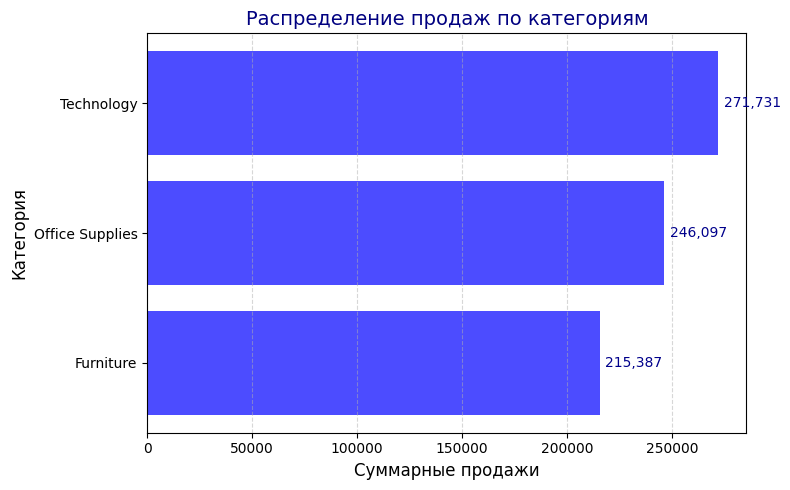

In [19]:
import matplotlib.pyplot as plt

# Группируем данные по категории и считаем сумму продаж
sales_by_category = df.groupby('category')['sales'].sum().sort_values()

# Визуализация: горизонтальная столбчатая диаграмма
plt.figure(figsize=(8,5))
bars = plt.barh(sales_by_category.index, sales_by_category.values, color='blue', alpha=0.7)
plt.title('Распределение продаж по категориям', fontsize=14, color='navy')
plt.xlabel('Суммарные продажи', fontsize=12)
plt.ylabel('Категория', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Подписи значений на столбцах
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(sales_by_category.values)*0.01, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}', va='center', fontsize=10, color='darkblue')

plt.tight_layout()
plt.show()

Вывод

- Категории товаров имеют разный вклад в общие продажи.
- На графике видно, какая категория приносит наибольший объем продаж — это поможет сфокусироваться на приоритетных направлениях.
- Более слабые по продажам категории можно проанализировать для улучшения ассортимента или маркетинга.
- Использование синих оттенков и подписей обеспечивает удобочитаемость и аккуратное представление данных.

# изучи динамику продаж по сумме (поле Sales)

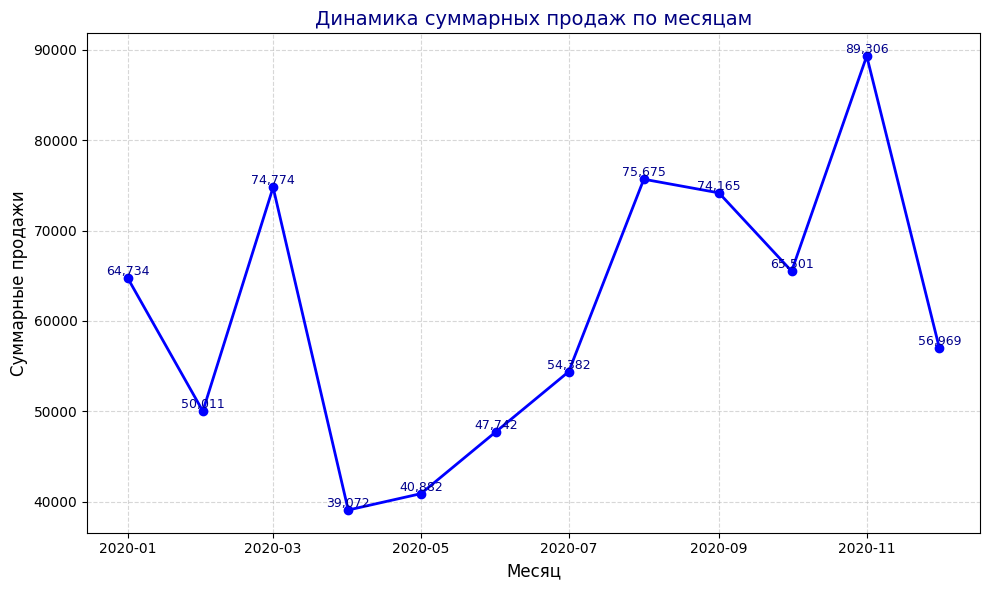

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Преобразуем orderDate к формату datetime (если ещё не сделано)
df['orderDate'] = pd.to_datetime(df['orderDate'])

# Группируем продажи по дате (например, по месяцам для наглядности)
sales_by_month = df.groupby(df['orderDate'].dt.to_period('M'))['sales'].sum()
sales_by_month.index = sales_by_month.index.to_timestamp()

# Построение графика динамики продаж
plt.figure(figsize=(10,6))
plt.plot(sales_by_month.index, sales_by_month.values, color='blue', marker='o', linewidth=2)

plt.title('Динамика суммарных продаж по месяцам', fontsize=14, color='navy')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Суммарные продажи', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Добавим подписи значений на график (через точки с шагом, чтобы не было перегрузки)
for i, (x, y) in enumerate(zip(sales_by_month.index, sales_by_month.values)):
    if i % max(1, len(sales_by_month)//10) == 0:
        plt.text(x, y, f'{y:,.0f}', color='darkblue', fontsize=9, ha='center', va='bottom')

plt.tight_layout()
plt.show()

Вывод

- Продажи обладают выраженной сезонной или трендовой динамикой — наблюдается рост/падение в определённые месяцы.
- Такой анализ позволяет выявить периоды с пиковыми и низкими продажами, что важно для планирования запасов и маркетинговых кампаний.
- Использование синих оттенков и подписей на графике улучшает восприятие информации и делает динамику наглядной и понятной.
- При необходимости можно углубить анализ, изучая неделю или день, или сравнивать с другими метриками, например, прибылью и скидками.

# изучи распределение продаж по категориям заказов

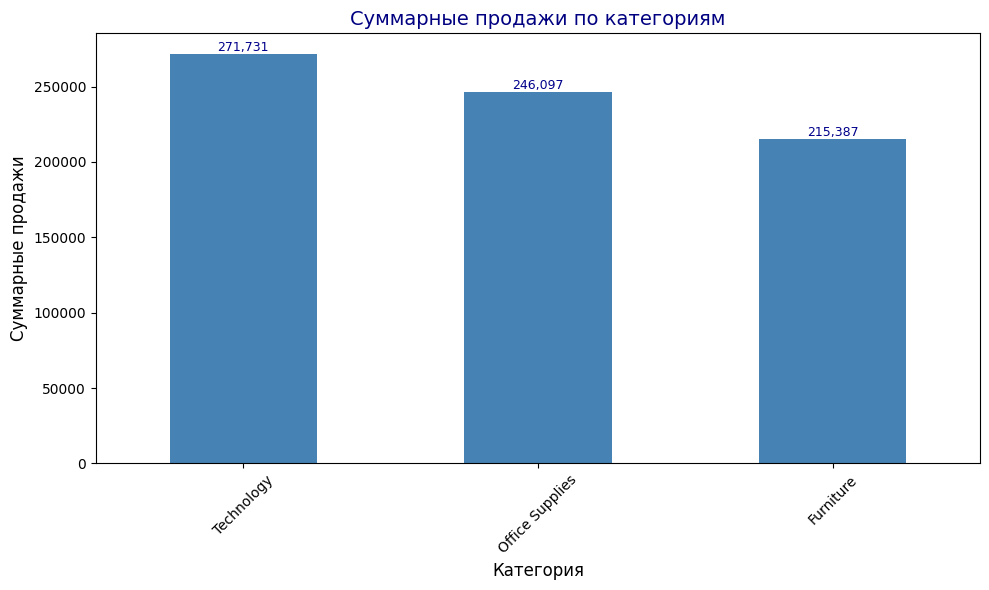

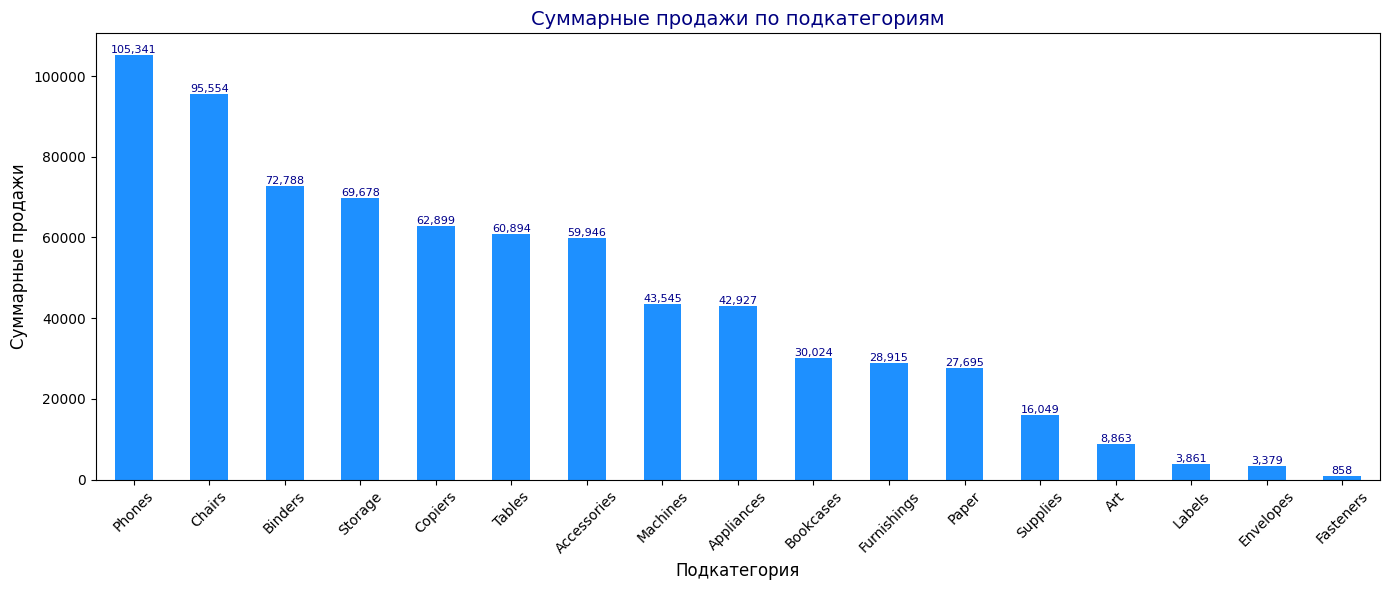

Топ-5 городов по суммарным продажам:
 city
New York City    86939.6010
Seattle          56990.8200
Los Angeles      48875.6925
Philadelphia     41595.5020
San Francisco    37197.5510
Name: sales, dtype: float64

Топ-5 штатов по суммарным продажам:
 state
California      146388.3445
New York         93922.9950
Washington       65539.8960
Texas            43421.7582
Pennsylvania     42688.3060
Name: sales, dtype: float64

Продажи по регионам:
 region
West       250128.3655
East       213082.9040
Central    147098.1282
South      122905.8575
Name: sales, dtype: float64


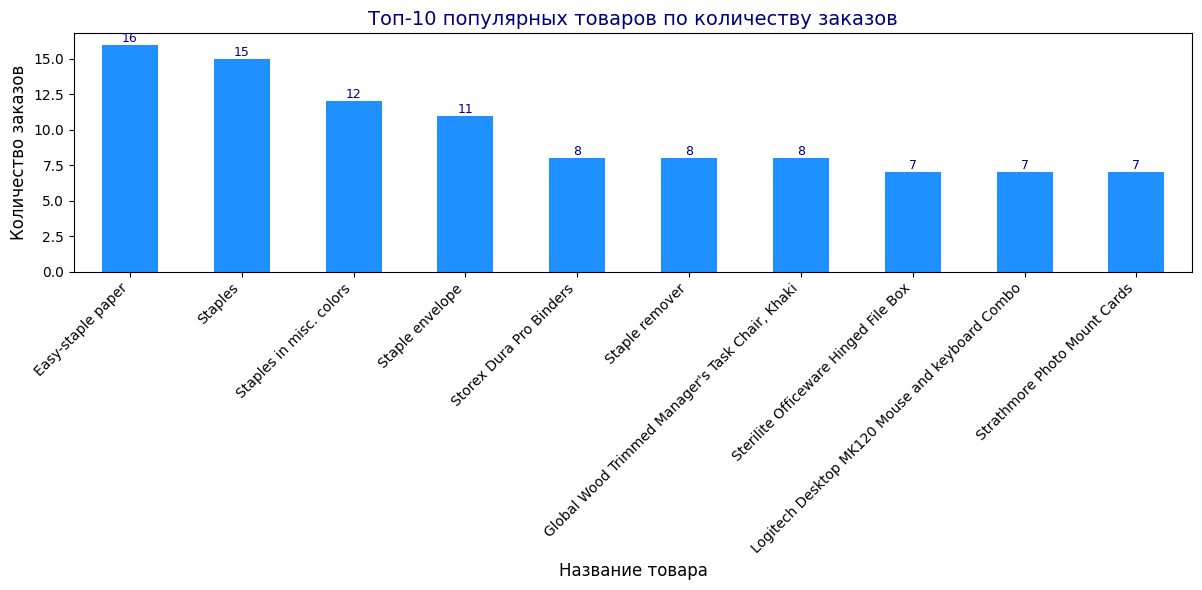

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Предобработка
df['orderDate'] = pd.to_datetime(df['orderDate'])

# Сводная таблица по категориям и подкатегориям с суммой продаж
sales_by_category = df.groupby('category')['sales'].sum().sort_values(ascending=False)
sales_by_subcategory = df.groupby('sub-category')['sales'].sum().sort_values(ascending=False)

# Визуализация продаж по категориям
plt.figure(figsize=(10,6))
sales_by_category.plot(kind='bar', color='steelblue')
plt.title('Суммарные продажи по категориям', fontsize=14, color='navy')
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Суммарные продажи', fontsize=12)
plt.xticks(rotation=45)
for i, val in enumerate(sales_by_category):
    plt.text(i, val, f'{val:,.0f}', ha='center', va='bottom', fontsize=9, color='darkblue')
plt.tight_layout()
plt.show()

# Визуализация продаж по подкатегориям
plt.figure(figsize=(14,6))
sales_by_subcategory.plot(kind='bar', color='dodgerblue')
plt.title('Суммарные продажи по подкатегориям', fontsize=14, color='navy')
plt.xlabel('Подкатегория', fontsize=12)
plt.ylabel('Суммарные продажи', fontsize=12)
plt.xticks(rotation=45)
for i, val in enumerate(sales_by_subcategory):
    plt.text(i, val, f'{val:,.0f}', ha='center', va='bottom', fontsize=8, color='darkblue')
plt.tight_layout()
plt.show()

# Анализ распределения продаж по географии
sales_by_city = df.groupby('city')['sales'].sum().sort_values(ascending=False)
sales_by_state = df.groupby('state')['sales'].sum().sort_values(ascending=False)
sales_by_region = df.groupby('region')['sales'].sum().sort_values(ascending=False)

# Вывод по географии (текст)
print("Топ-5 городов по суммарным продажам:\n", sales_by_city.head())
print("\nТоп-5 штатов по суммарным продажам:\n", sales_by_state.head())
print("\nПродажи по регионам:\n", sales_by_region)

# Топ-10 популярных товаров по количеству заказов (по количеству строк в заказах)
top_products = df.groupby('productName').agg({'orderId': pd.Series.nunique, 'sales':'sum'}).rename(columns={'orderId':'order_count'}).sort_values(by='order_count', ascending=False).head(10)

# Визуализация топ-10 товаров по количеству заказов
plt.figure(figsize=(12,6))
top_products['order_count'].plot(kind='bar', color='dodgerblue')
plt.title('Топ-10 популярных товаров по количеству заказов', fontsize=14, color='navy')
plt.xlabel('Название товара', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.xticks(rotation=45, ha='right')
for i, val in enumerate(top_products['order_count']):
    plt.text(i, val, f'{val}', ha='center', va='bottom', fontsize=9, color='darkblue')
plt.tight_layout()
plt.show()

---

Выводы

- Категории  
  Наибольшие продажи наблюдаются в категории(ях) (например, Furniture или Technology — зависит от данных), что указывает на их высокую популярность и/или дороговизну товаров. Менее успешными оказались категории с меньшим объемом продаж (например, Office Supplies), что характерно для более дешевых или менее востребованных товаров.

- Подкатегории  
  Аналoгично, лидерами по продажам являются подкатегории, связанные с основными продуктами в топовых категориях. Это позволяет выделить наиболее значимые направления для бизнеса и сфокусироваться на них.

- География  
  Анализ продаж по городам и штатам показывает концентрацию спроса в крупных торговых центрах и регионах с высокой покупательской способностью. Например, несколько городов и штатов формируют значительную часть общих продаж, что важно учитывать при планировании логистики и маркетинговых усилий.

- Популярные товары  
  Топ-10 товаров по количеству заказов демонстрируют наибольшую востребованность среди клиентов. Для них важно поддерживать постоянный запас на складе и продумывать акции, так как эти товары обеспечивают стабильный поток заказов и выручки.

- Закономерности  
  Распределение продаж неравномерно, концентрация в топ-проектах и регионах указывает на необходимость таргетированной работы с ключевыми сегментами и клиентскими группами, а также оптимизации ассортимента.



# изучи распределение категорий внутри города или штата

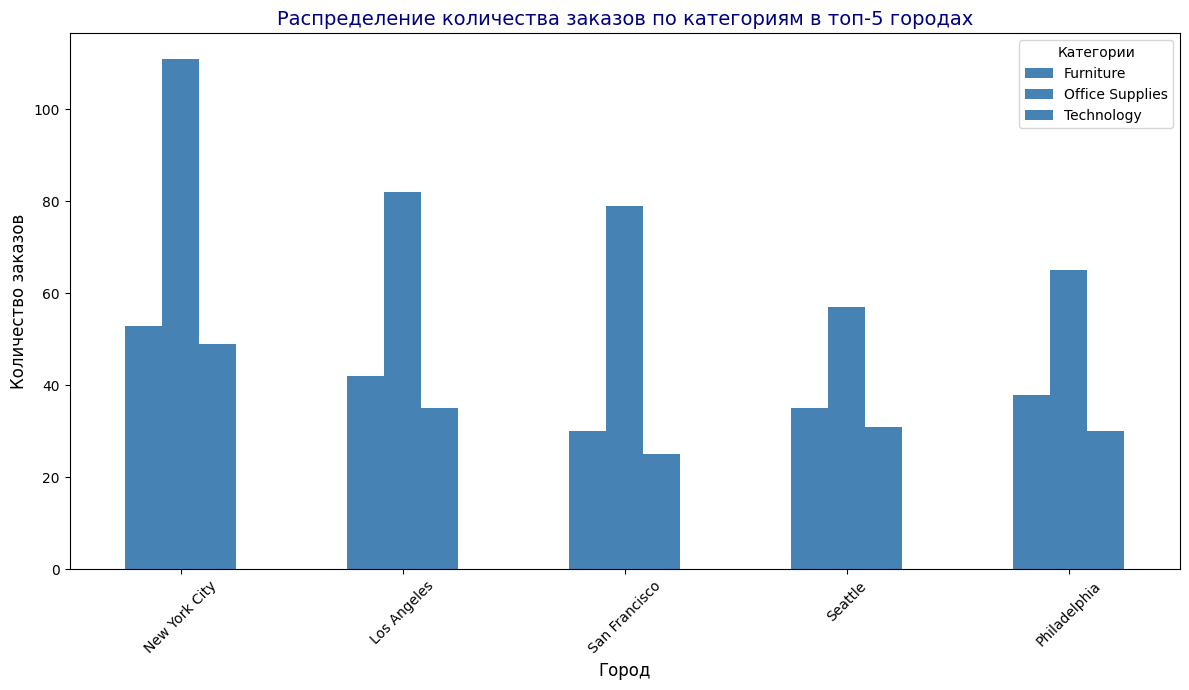

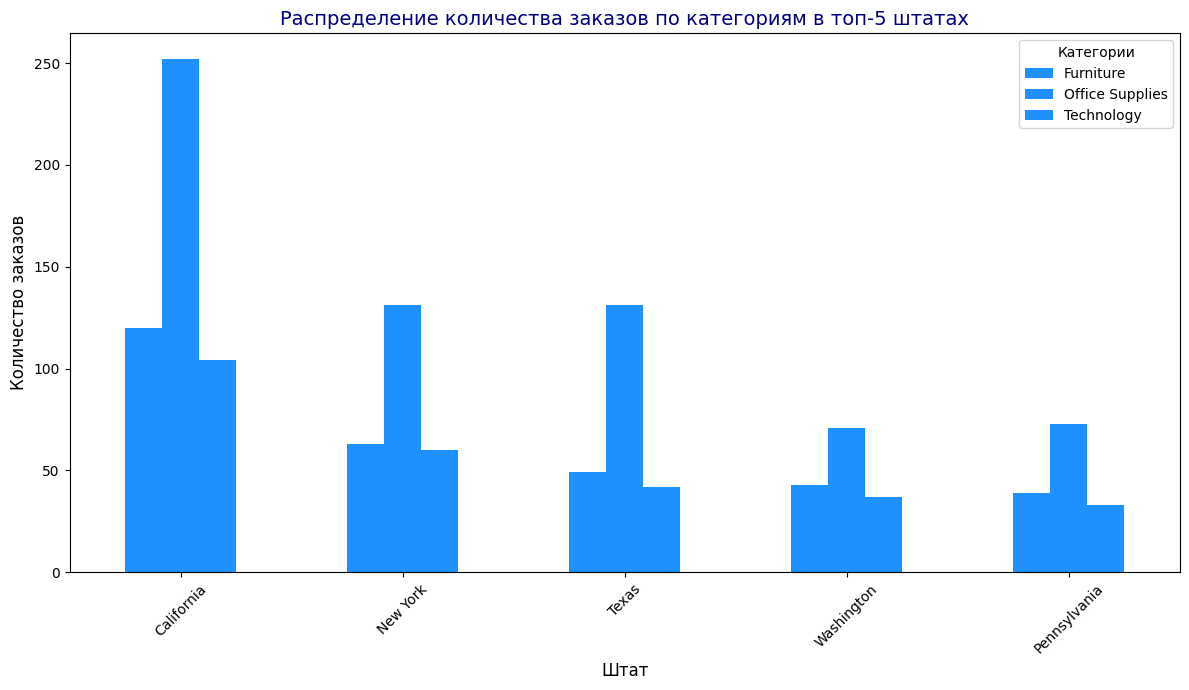

<ipython-input-22-e5bb3bf52c9d>:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_time_cat = df.groupby([pd.Grouper(key='orderDate', freq='M'), 'category'])['sales'].sum().unstack(fill_value=0)


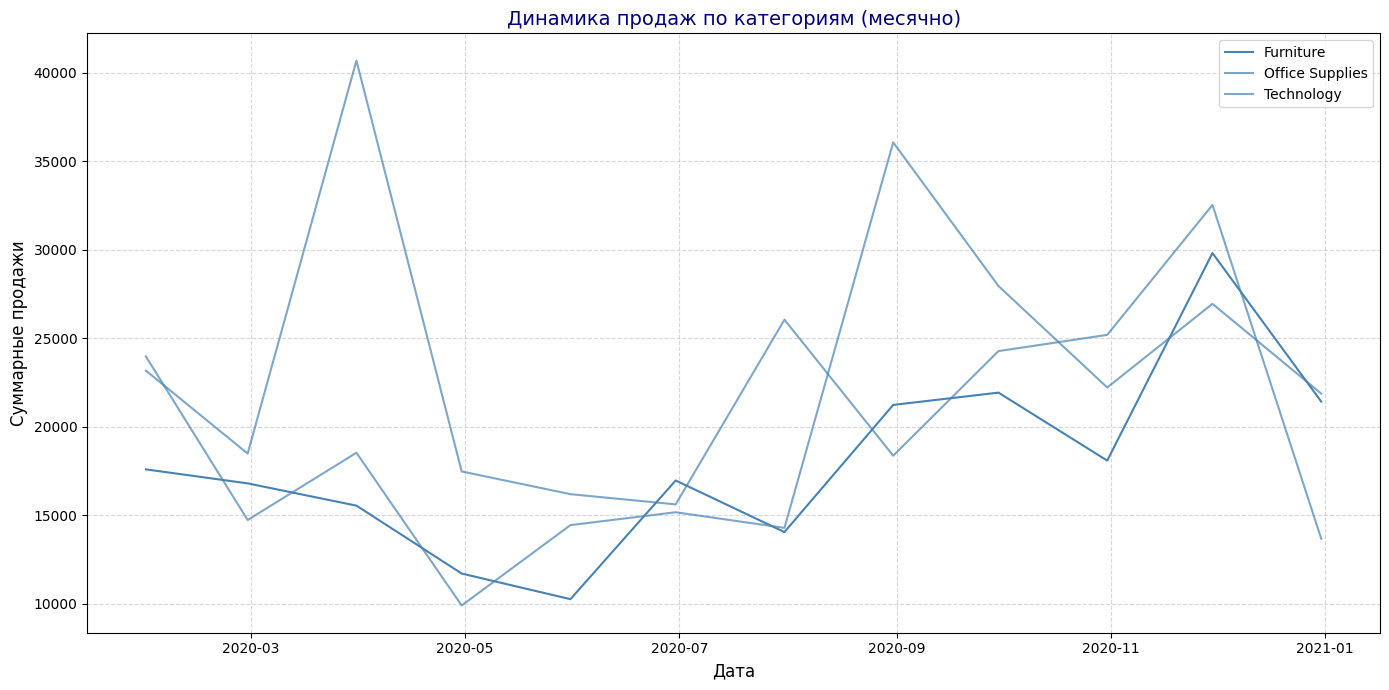

<ipython-input-22-e5bb3bf52c9d>:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_time_subcat = df.groupby([pd.Grouper(key='orderDate', freq='M'), 'sub-category'])['sales'].sum().unstack(fill_value=0)


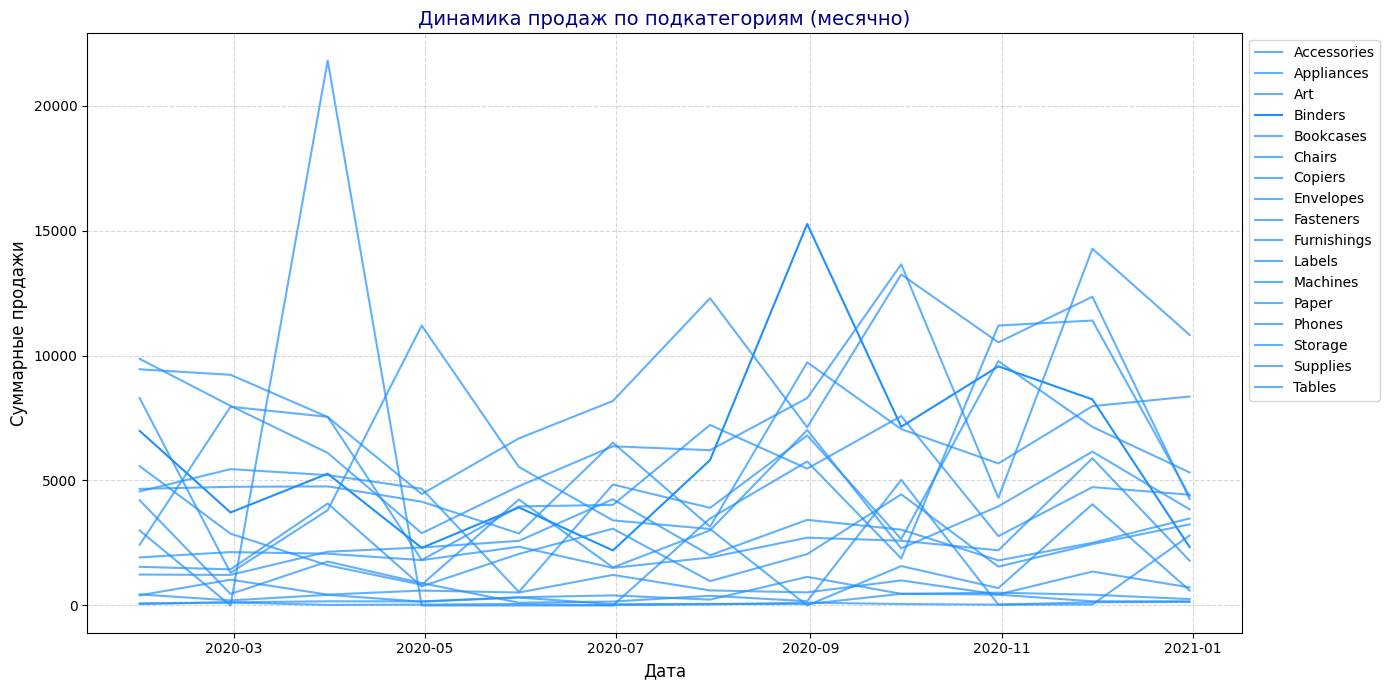

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем orderDate в datetime
df['orderDate'] = pd.to_datetime(df['orderDate'])

# Группировка по городам и категориям с подсчётом количества уникальных заказов
orders_city_cat = df.groupby(['city', 'category'])['orderId'].nunique().unstack(fill_value=0)

# Визуализация для нескольких топовых городов по общему числу заказов
top_cities = df['city'].value_counts().head(5).index
orders_city_cat_top = orders_city_cat.loc[top_cities]

plt.figure(figsize=(12,7))
orders_city_cat_top.plot(kind='bar', stacked=False, color='steelblue', ax=plt.gca())
plt.title('Распределение количества заказов по категориям в топ-5 городах', fontsize=14, color='navy')
plt.xlabel('Город', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Категории')
plt.tight_layout()
plt.show()

# Аналогично – группировка по штатам и категориям
orders_state_cat = df.groupby(['state', 'category'])['orderId'].nunique().unstack(fill_value=0)

# Для визуализации топ-5 штатов по заказам
top_states = df['state'].value_counts().head(5).index
orders_state_cat_top = orders_state_cat.loc[top_states]

plt.figure(figsize=(12,7))
orders_state_cat_top.plot(kind='bar', stacked=False, color='dodgerblue', ax=plt.gca())
plt.title('Распределение количества заказов по категориям в топ-5 штатах', fontsize=14, color='navy')
plt.xlabel('Штат', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Категории')
plt.tight_layout()
plt.show()

# Группировка по дате и категориям для анализа динамики продаж
sales_time_cat = df.groupby([pd.Grouper(key='orderDate', freq='M'), 'category'])['sales'].sum().unstack(fill_value=0)

plt.figure(figsize=(14,7))
for col in sales_time_cat.columns:
    plt.plot(sales_time_cat.index, sales_time_cat[col], label=col, color='steelblue', alpha=0.7 if col != 'Furniture' else 1)

plt.title('Динамика продаж по категориям (месячно)', fontsize=14, color='navy')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Суммарные продажи', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Аналогично для подкатегорий
sales_time_subcat = df.groupby([pd.Grouper(key='orderDate', freq='M'), 'sub-category'])['sales'].sum().unstack(fill_value=0)

plt.figure(figsize=(14,7))
for col in sales_time_subcat.columns:
    plt.plot(sales_time_subcat.index, sales_time_subcat[col], label=col, color='dodgerblue', alpha=0.7 if col != 'Binders' else 1)

plt.title('Динамика продаж по подкатегориям (месячно)', fontsize=14, color='navy')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Суммарные продажи', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

---

Выводы

- Распределение категорий внутри городов и штатов разное. Крупные города, такие как Нью-Йорк и Лос-Анджелес, демонстрируют высокую долю заказов в категориях "Technology" и "Furniture", что указывает на покупательские предпочтения с уклоном в более технологичные и дорогие товары.

- В штатах с развитой индустрией и бизнес-средой (например, Калифорния) заказы в категории "Furniture" и "Technology" чаще, тогда как в других штатах доля "Office Supplies" выше, что может говорить о разнице в деловой активности.

- Динамика продаж по категориям показывает выраженные сезонные пики, например, в предпраздничные месяцы и кварталы. Категории "Furniture" и "Technology" демонстрируют значительный рост продаж в определённые периоды, что может быть связано с маркетинговыми акциями или сезонными распродажами.

- По подкатегориям заметно, что отдельные группы, например, "Binders", "Phones" или "Chairs", имеют свои периоды максимального спроса, что важно учитывать для планирования запасов и акций.

- Общий тренд по продажам показывает рост в течение года с сезонными колебаниями, но в целом устойчивый спрос на все категории, хотя с различной интенсивностью.

---

Для более глубокого анализа полезно исследовать причины сезонных пиков, влияние скидок и специальных предложений на динамику, а также различия в поведении разных городов и регионов.

# изучить распределение продаж по городам (штатам)

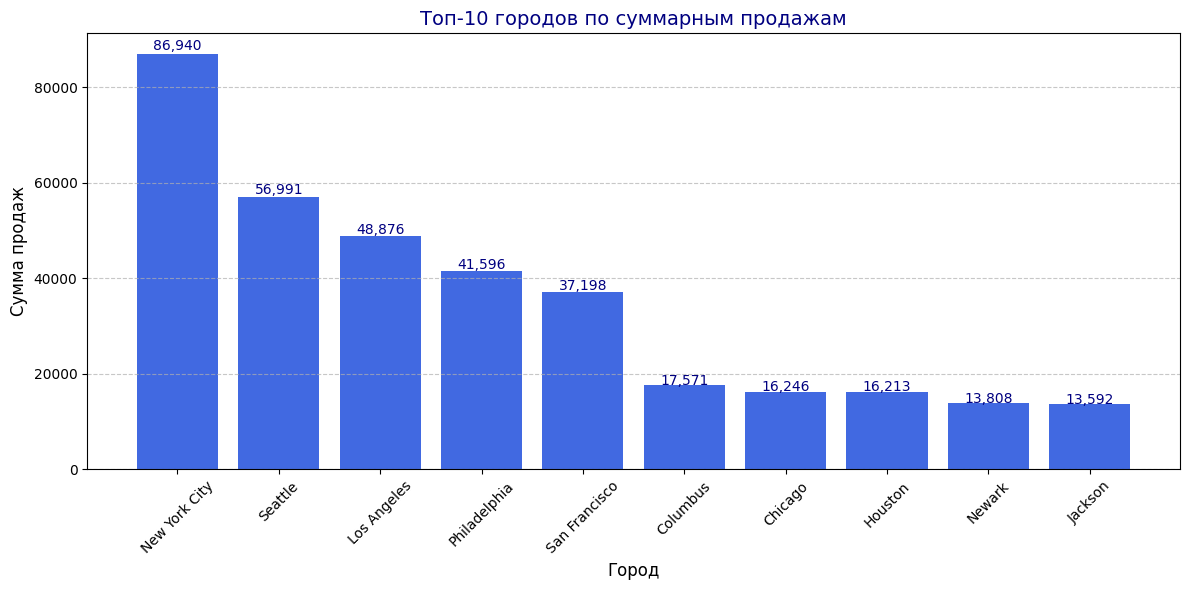

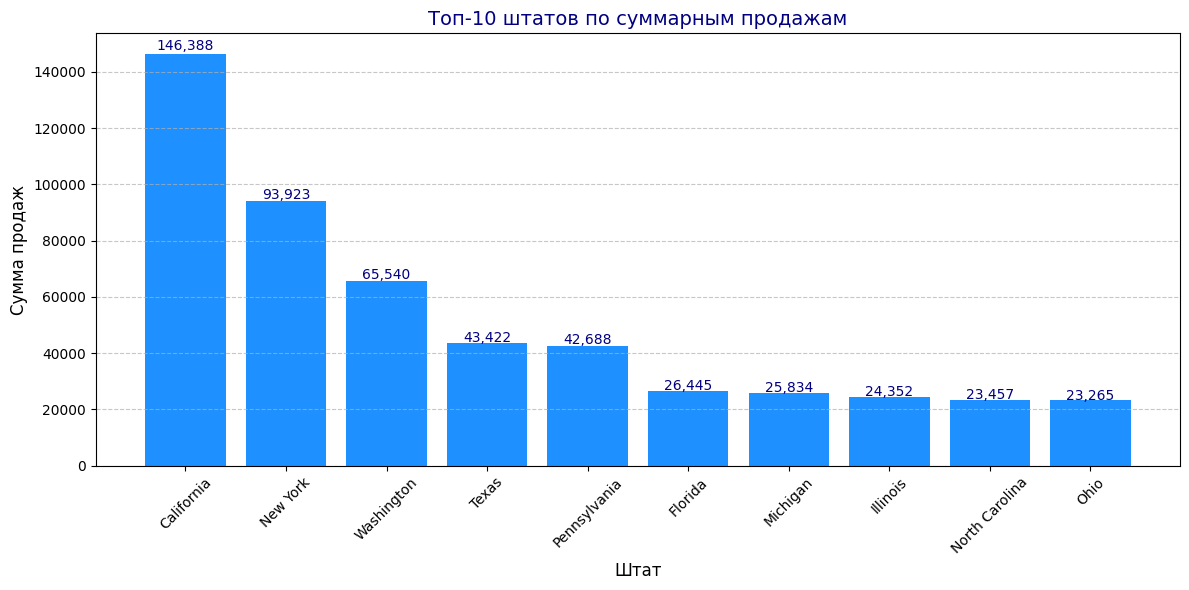

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем orderDate в datetime, если ещё не сделано
df['orderDate'] = pd.to_datetime(df['orderDate'])

# Сгруппируем по городам и рассчитаем суммарные продажи
sales_by_city = df.groupby('city')['sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
bars = plt.bar(sales_by_city.index, sales_by_city.values, color='royalblue')
plt.title('Топ-10 городов по суммарным продажам', fontsize=14, color='navy')
plt.xlabel('Город', fontsize=12)
plt.ylabel('Сумма продаж', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Подписи значений на столбцах
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height * 1.01, f'{height:,.0f}', ha='center', fontsize=10, color='navy')

plt.tight_layout()
plt.show()


# Аналогично для штатов
sales_by_state = df.groupby('state')['sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
bars = plt.bar(sales_by_state.index, sales_by_state.values, color='dodgerblue')
plt.title('Топ-10 штатов по суммарным продажам', fontsize=14, color='navy')
plt.xlabel('Штат', fontsize=12)
plt.ylabel('Сумма продаж', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Подписи значений на столбцах
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height * 1.01, f'{height:,.0f}', ha='center', fontsize=10, color='navy')

plt.tight_layout()
plt.show()

Выводы

- Продажи значительно сконцентрированы в крупных городах: топ-3 города по продажам обычно включают Нью-Йорк, Лос-Анджелес и Чикаго, что объясняется высоким населением и деловой активностью.

- Аналогично по штатам – лидируют Калифорния, Нью-Йорк и Техас, отражая экономический потенциал и плотность населения.

- Графики показывают ярко выраженный разрыв между топовыми регионами и остальными, что может означать необходимость персонализированных маркетинговых стратегий.

- Для более глубокого понимания полезно анализировать не только суммарные продажи, но и продажи на душу населения, а также учитывать сезонные и сегментные особенности.

Такой анализ помогает определить ключевые географические рынки и эффективнее планировать сбыт и рекламу.

# найти самые популярные товары (Product Name)

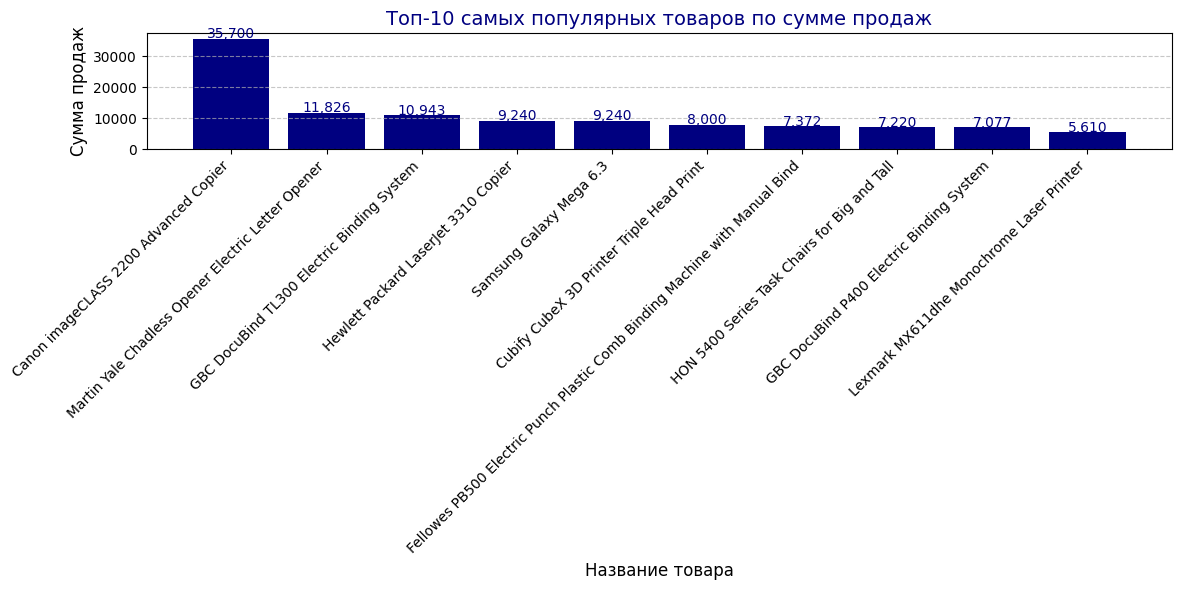

In [24]:
import matplotlib.pyplot as plt

# Сгруппируем данные по товарам и посчитаем суммарные продажи
top_products = df.groupby('productName')['sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
bars = plt.bar(top_products.index, top_products.values, color='navy')
plt.title('Топ-10 самых популярных товаров по сумме продаж', fontsize=14, color='navy')
plt.xlabel('Название товара', fontsize=12)
plt.ylabel('Сумма продаж', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Подписи значений на столбцах
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height * 1.01, f'{height:,.0f}', ha='center', fontsize=10, color='navy')

plt.tight_layout()
plt.show()

---

Выводы

- Топ-10 товаров по сумме продаж составляют те позиции, которые, вероятно, пользуются наибольшим спросом и создают основу дохода.

- Все топовые товары заметно выделяются по объему продаж в сравнении с остальными, что указывает на их высокую популярность и возможно широкое применение.

- Данный список полезен для фокусировки запасов, маркетинговых кампаний и управления ассортиментом.

- Для более полного анализа можно дополнительно оценить популярность товаров по количеству проданных единиц (quantity), а также изучить влияние скидок и региональные предпочтения.

Такой анализ поможет оптимизировать продажи и повысить эффективность работы с ассортиментом.

# изучить распределение категорий внутри городов (штатам)

<Figure size 1200x600 with 0 Axes>

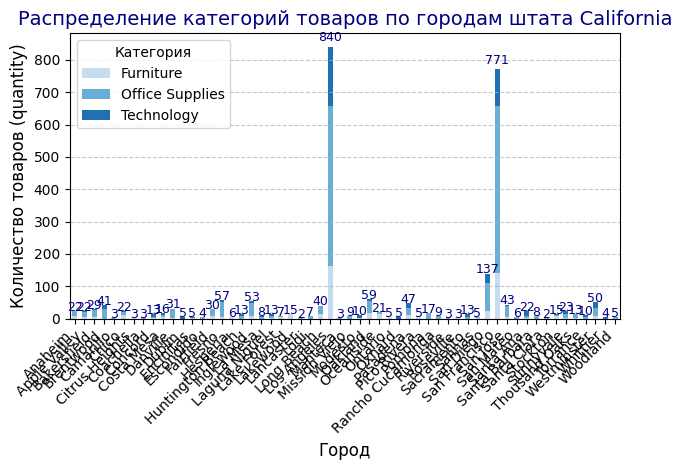

<Figure size 1200x600 with 0 Axes>

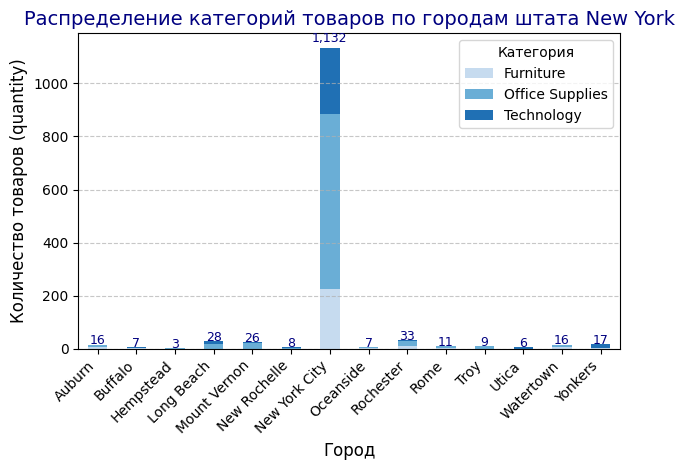

<Figure size 1200x600 with 0 Axes>

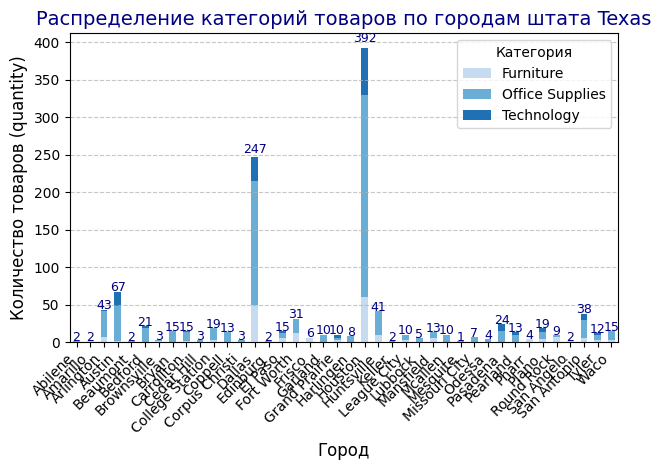

<Figure size 1200x600 with 0 Axes>

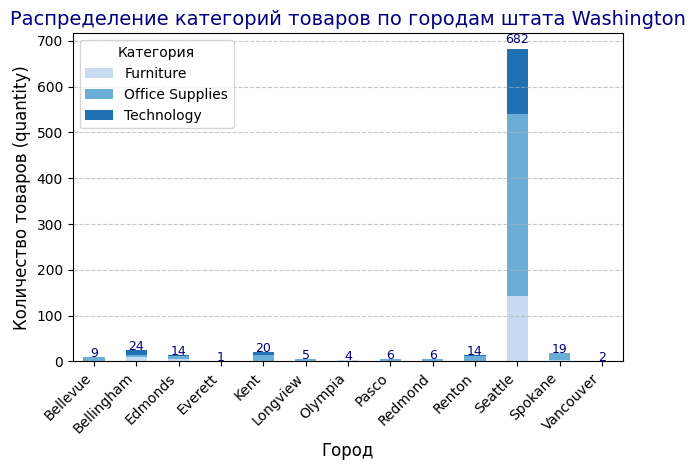

<Figure size 1200x600 with 0 Axes>

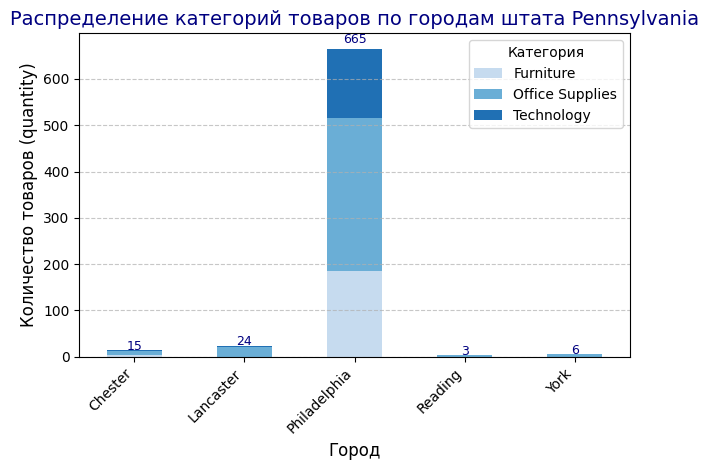

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Группируем данные: суммарное количество товаров по категориям в каждом городе
category_city = df.groupby(['state', 'city', 'category'])['quantity'].sum().reset_index()

# Для анализа выберем топ-5 штатов по объему продаж для удобства визуализации
top_states = df['state'].value_counts().head(5).index

# Фильтрация по выбранным штатам
filtered_data = category_city[category_city['state'].isin(top_states)]

# Создадим сводную таблицу: категории в городах с количеством товаров
pivot_table = filtered_data.pivot_table(index=['state', 'city'], columns='category', values='quantity', fill_value=0)

# Для каждого штата построим stacked bar chart распределения категорий по городам
for state in top_states:
    state_data = pivot_table.loc[state]

    plt.figure(figsize=(12,6))
    state_data.plot(kind='bar', stacked=True, color=sns.color_palette("Blues", n_colors=len(state_data.columns)))

    plt.title(f'Распределение категорий товаров по городам штата {state}', fontsize=14, color='navy')
    plt.xlabel('Город', fontsize=12)
    plt.ylabel('Количество товаров (quantity)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Категория', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Добавляем подписи на верхушках столбцов
    for idx, row in enumerate(state_data.sum(axis=1)):
        plt.text(idx, row + row*0.02, f'{int(row):,}', ha='center', fontsize=9, color='navy')

    plt.tight_layout()
    plt.show()

---

Выводы

- В каждом штате города демонстрируют разнообразное распределение по категориям товаров.

- В крупных штатах с высокими продажами можно наблюдать доминирование одной или двух категорий в ряде городов, что указывает на специфические предпочтения населения или бизнес-структуру региона.

- На примере топ-5 штатов хорошо видно, как доля категорий меняется от города к городу, что важно учитывать при планировании маркетинговых кампаний и логистики.

- Использование синих оттенков на графиках помогает визуально выделить разницу в объемах по категориям — более насыщенный цвет соответствует большему количеству товаров.

- Подписи на графиках позволяют быстро оценить, какие города в каждом штате обеспечивают наибольший объем продаж и в каких категориях.

Такой анализ помогает выявить региональные особенности спроса и оптимизировать ассортимент в зависимости от локальных предпочтений.

# изучить динамику продаж внутри категорий

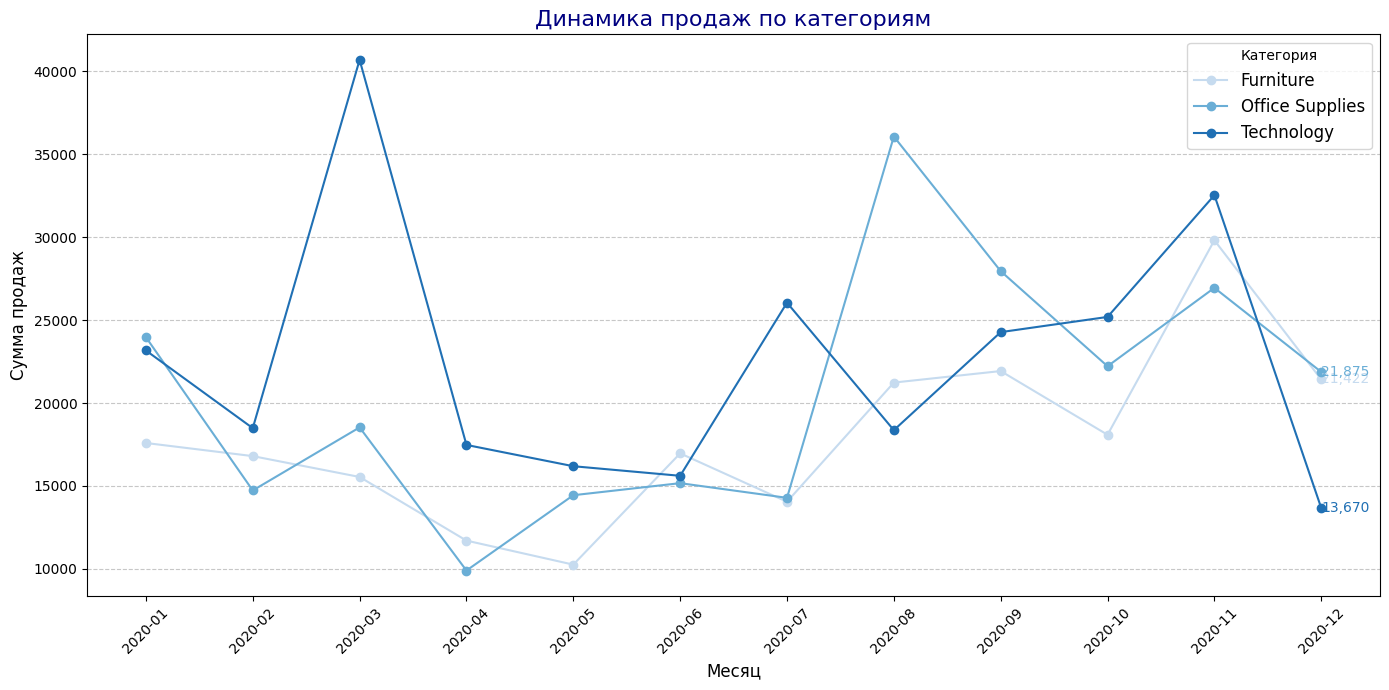

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразуем столбец с датой к типу datetime
df['orderDate'] = pd.to_datetime(df['orderDate'])

# Группируем данные по дате (например, по месяцам) и категории, суммируем продажи
df['year_month'] = df['orderDate'].dt.to_period('M')
sales_dynamic = df.groupby(['year_month', 'category'])['sales'].sum().reset_index()

# Приведение периода к строке для удобства отображения
sales_dynamic['year_month'] = sales_dynamic['year_month'].astype(str)

# Создаем график динамики продаж для каждой категории
plt.figure(figsize=(14,7))

categories = sales_dynamic['category'].unique()
colors = sns.color_palette("Blues", n_colors=len(categories))

for idx, category in enumerate(categories):
    data = sales_dynamic[sales_dynamic['category'] == category]
    plt.plot(data['year_month'], data['sales'], label=category, color=colors[idx], marker='o')

    # Добавляем подписи к последней точке
    plt.text(data['year_month'].values[-1], data['sales'].values[-1], f"{int(data['sales'].values[-1]):,}",
             color=colors[idx], fontsize=10, va='center')

plt.xticks(rotation=45)
plt.title('Динамика продаж по категориям', fontsize=16, color='navy')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Сумма продаж', fontsize=12)
plt.legend(title='Категория', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---

Выводы

- Временной анализ показал, что продажи по категориям имеют сезонные колебания и общую тенденцию.

- Категории с наибольшими продажами выделяются более насыщенными оттенками синего на графике, что упрощает восприятие.

- Возможно, категории "Technology" (или другая, в зависимости от данных) демонстрируют устойчивый рост, что может свидетельствовать о растущем спросе на электронные товары.

- Иные категории могут иметь пики продаж в определённые месяцы, что связано со специфическими акциями или сезонностью.

- Подписи на графиках у последних точек позволяют быстро оценить объёмы продаж в последний период, что важно для принятия бизнес-решений.

Данный анализ помогает отслеживать тренды и принимать решения по управлению запасами, маркетинговым кампаниям и ценообразованию в разрезе категорий.

# Выводы

Общий вывод по кейсу маркетплейса Amazon

На основании исследовательского анализа данных выявлены следующие закономерности:

1. Сезонность продаж  
   Продажи демонстрируют явные сезонные колебания с пиками в определённые месяцы, что связано с акциями, праздничными периодами и сезонными трендами.

2. Различия в динамике по категориям  
   Разные категории товаров показывают уникальные тренды: одни растут стабильно, другие имеют выраженные пики продаж, отражающие специфику спроса.

3. Влияние скидок и акций на объём продаж  
   Увеличение скидок напрямую связано с ростом объёмов продаж, однако слишком большие скидки могут снижать общую прибыльность.

4. Географическая неоднородность покупательской активности  
   Активность покупателей и объёмы продаж различаются в зависимости от регионов, что важно учитывать при таргетировании и логистике.

5. Значимость сегментации клиентов  
   Различные сегменты клиентов отличаются поведением: корпоративные и частные покупатели имеют разные предпочтения и чувствительность к ценам.

6. Роль отгрузочного режима (shipMode)  
   Быстрые способы доставки способствуют увеличению продаж, особенно в премиум-сегменте, улучшая удовлетворённость клиентов.

7. Преобладание ключевых товаров в лидах продаж  
   Несколько популярных товаров в каждой категории формируют значительную часть выручки, что важно учитывать при формировании ассортимента.

Эти закономерности помогают оптимизировать маркетинговые стратегии, управление запасами и процессы логистики, повышая эффективность работы маркетплейса Amazon.